In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import KFold
import sklearn

from sklearn.preprocessing import normalize

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef


from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans

import xgboost as xgb
from xgboost import plot_importance

from sklearn.manifold import TSNE
from matplotlib import cm

In [94]:
month_features = pd.read_csv('../EDA/launch_month_feature.csv')
month_features = month_features.join(pd.get_dummies(month_features.launch_month))
# display(month_features)
del month_features['launch_month']
display(month_features)

,product_id,1,2,3,4,5,6,7,8,9,10,11,12
0,2134,0,1,0,0,0,0,0,0,0,0,0,0
1,2135,0,1,0,0,0,0,0,0,0,0,0,0
2,2136,0,1,0,0,0,0,0,0,0,0,0,0
3,2137,1,0,0,0,0,0,0,0,0,0,0,0
4,2138,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,5385,0,0,0,0,0,0,0,0,0,0,0,1
1917,5386,0,0,0,0,0,0,0,0,0,0,0,1
1918,5387,0,0,0,0,0,0,0,0,0,0,0,1
1919,5388,0,0,0,0,0,0,0,0,0,0,0,1


In [95]:
features_table = pd.read_csv('../dataset/final/final/new_features/human_features.csv')

labels_table = pd.read_csv('seasonality_patterns.csv')
display(labels_table.shape)
data_table = pd.merge(features_table,month_features, on = 'product_id')
data_table = pd.merge(data_table,labels_table[['product_id','cluster_num']])
del data_table['season_summer']
del data_table['season_winter']
display(data_table)


(1362, 14)

,product_id,body,bretelles,cache_coeur,col_batea,col_bateau,col_bénit,col_bénitier,col_carré,col_fendu,...,4,5,6,7,8,9,10,11,12,cluster_num
0,2134,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2135,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,2136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,2137,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,2138,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,5367,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
1358,5369,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
1359,5370,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
1360,5371,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6


In [96]:
new_data_test = data_table.replace(0,np.nan)
display(new_data_test)
remove_list = []
for i in range(len(new_data_test.isnull().all())):
    if new_data_test.isnull().all().iloc[i] == True:
        remove_list.append(list(new_data_test.isnull().all().index)[i])
print(remove_list)

,product_id,body,bretelles,cache_coeur,col_batea,col_bateau,col_bénit,col_bénitier,col_carré,col_fendu,...,4,5,6,7,8,9,10,11,12,cluster_num
0,2134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,2136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,2137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,2138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,5367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0
1358,5369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0
1359,5370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0
1360,5371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0


['cache_coeur', 'col_bateau', 'col_rapporté', 'gilet_court_(<65cm)', 'tshirt_asymétrique', 'Autres fibres', 'Fluorofibre', 'Metal/ metallique', 'Polypropylene']


In [97]:
for col in remove_list:
    del data_table[col]
display(data_table)

,product_id,body,bretelles,col_batea,col_bénit,col_bénitier,col_carré,col_fendu,col_monta,col_montant,...,4,5,6,7,8,9,10,11,12,cluster_num
0,2134,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2135,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,2136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,2137,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,2138,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,5367,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
1358,5369,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
1359,5370,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
1360,5371,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6


In [111]:

X = data_table.iloc[:,1:-1]
y = data_table.iloc[:,-1]
# X['price'] = np.log(X['price'])
#normalization
X_norm = pd.DataFrame(normalize(X), columns = list(X))
type(X_norm)
display(X_norm)

,body,bretelles,col_batea,col_bénit,col_bénitier,col_carré,col_fendu,col_monta,col_montant,col_polo,...,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010502
1358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010502
1359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010502
1360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010502


In [189]:
# display(list(X_norm))
X_norm.rename(columns = {'tshirt_court_(<45cm)':'tshirt_court_(45cm)','tshirt_long_(>65cm)':'tshirt_long_(65cm)'},
             inplace = True)
display(list(X_norm))

['body',
 'bretelles',
 'col_batea',
 'col_bénit',
 'col_bénitier',
 'col_carré',
 'col_fendu',
 'col_monta',
 'col_montant',
 'col_polo',
 'col_rond',
 'col_roulé',
 'col_v',
 'divers',
 'dos_nu',
 'manches_3/4',
 'manches_courtes',
 'manches_longues',
 'sans_col',
 'sans_manches',
 'tshirt_bandeau',
 'tshirt_court_(45cm)',
 'tshirt_long_(65cm)',
 'tshirt_standard_45/65cm',
 'basique',
 'brodé',
 'cropped',
 'côtelé',
 'dentelle',
 'débardeur',
 'fines',
 'imprimé',
 'maille',
 'message',
 'price',
 'color_beige',
 'color_black',
 'color_blue',
 'color_brown',
 'color_green',
 'color_grey',
 'color_orange',
 'color_pink',
 'color_purple',
 'color_red',
 'color_white',
 'color_yellow',
 'Acrylique',
 'Coton',
 'Elasthanne',
 'Fibre metallisée',
 'Lin',
 'Lyocell',
 'Modal',
 'Polyamide',
 'Polyamide enduit',
 'Polyester',
 'Viscose',
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12]

cluster_num
0    175
1    230
2    187
3    163
4    190
5    132
6    157
7    128
dtype: int64

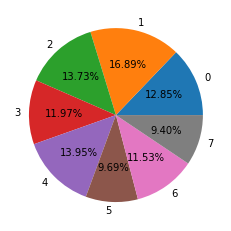

In [99]:
display(data_table.groupby('cluster_num').size())
labels_plot = [i for i in range(0,8)]
plt.pie(data_table.groupby('cluster_num').size(),labels = labels_plot,autopct = '%3.2f%%')
plt.show()

In [100]:
##K fold CV
k = 7
kf = KFold(n_splits = k, shuffle = True, random_state=0)

In [ ]:
smo = SMOTE(random_state=0)
X_smo, y_smo = smo.fit_resample(X_train, y_train)

In [128]:
display(y)
one_hot_y = pd.get_dummies(y)
display(one_hot_y)

0       0
1       5
2       5
3       5
4       0
       ..
1357    6
1358    6
1359    6
1360    6
1361    6
Name: cluster_num, Length: 1362, dtype: int64

,0,1,2,3,4,5,6,7
0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1357,0,0,0,0,0,0,1,0
1358,0,0,0,0,0,0,1,0
1359,0,0,0,0,0,0,1,0
1360,0,0,0,0,0,0,1,0


In [207]:
labels = [i for i in range(8)]

# -Random Forest

In [129]:
##Grid search
RF_dataframe = []
X_train, X_test, y_train, y_test = train_test_split(
    X_norm,y, train_size=0.8, random_state=11)
parameters = {'ccp_alpha':np.arange(0,0.05,0.01),
              'max_features':['auto','sqrt','log2']}
RF = RandomForestClassifier(n_estimators=1000) 
models = GridSearchCV(RF, param_grid= parameters,
                   scoring = 'f1_macro',cv = kf)

grid = models.fit(X_train,y_train)
reg = grid.best_estimator_
print('--------RF ')
print('best score: %f'%grid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('{}: {}'.format(key, reg.get_params()[key]))
    print('test score: %f'%reg.score(X_test, y_test))
RF_dataframe.append(pd.DataFrame(grid.cv_results_).T)
# display(Ridge_dataframe)

KeyboardInterrupt: 

In [205]:
##Fine-tune -------------------------------------------------------------
RF_dataframe = []
X_train, X_test, y_train, y_test = train_test_split(
    X_norm,one_hot_y, train_size=0.8, random_state=11)
parameters = {'ccp_alpha':[0],
              'max_features':['log2'],
             'min_samples_leaf':[1]}
RF = RandomForestClassifier(n_estimators=1000) 
models = GridSearchCV(RF, param_grid= parameters,
                   scoring = 'f1_weighted',cv = kf)

grid = models.fit(X_train,y_train)
reg = grid.best_estimator_
print('--------RF ')
print('best score: %f'%grid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('{}: {}'.format(key, reg.get_params()[key]))
    print('test score: %f'%reg.score(X_test, y_test))
RF_dataframe.append(pd.DataFrame(grid.cv_results_).T)
# display(Ridge_dataframe)

--------RF 
best score: 0.627108
best parameters:
ccp_alpha: 0
test score: 0.549451
max_features: log2
test score: 0.549451
min_samples_leaf: 1
test score: 0.549451


In [220]:
RF_metrics = []

time_start = time.time()

metrics = []

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_norm,
                                                            y,
                                                            test_size = 0.2,
                                                            random_state = 11)

RF = RandomForestClassifier(n_estimators=1000,
                           max_features = 'log2',
                           random_state = 7)
RF.fit(X_train_i,y_train_i)
pred_train_i = RF.predict(X_train_i)
pred_test_i = RF.predict(X_test_i)

display(pred_test_i)

metrics_list = [accuracy_score, f1_score, matthews_corrcoef]

for i,f in enumerate(metrics_list):
    if i ==1:
        metric_result_train = f(y_train_i,pred_train_i, average = 'weighted')
        metric_result_test = f(y_test_i,pred_test_i, average = 'weighted')
    else:
        metric_result_train = f(y_train_i,pred_train_i)
        metric_result_test = f(y_test_i,pred_test_i)
    metrics.append(metric_result_train)
    metrics.append(metric_result_test)

conf_matrix = confusion_matrix(y_test_i,pred_test_i,labels = labels, normalize = 'true')
conf_matrix = pd.DataFrame(conf_matrix)
conf_matrix.to_csv('conf_matrix_RF.csv')

RF_metrics.append(metrics)

time_end = time.time()

total_time = time_end-time_start
print('total time: ', total_time)
print(RF_metrics)

array([6, 0, 1, 0, 7, 5, 3, 3, 7, 0, 7, 2, 0, 6, 4, 1, 0, 2, 2, 5, 4, 3,
       1, 3, 7, 0, 5, 1, 2, 1, 4, 0, 5, 1, 5, 1, 6, 6, 5, 1, 4, 1, 2, 7,
       2, 3, 1, 7, 3, 6, 0, 1, 6, 5, 2, 4, 3, 1, 7, 6, 6, 0, 3, 6, 2, 3,
       5, 4, 6, 2, 6, 5, 5, 1, 1, 3, 6, 6, 7, 3, 1, 7, 3, 5, 3, 0, 4, 7,
       6, 2, 7, 0, 7, 5, 4, 1, 1, 6, 7, 4, 3, 3, 4, 3, 6, 3, 6, 6, 0, 3,
       2, 0, 7, 2, 6, 5, 7, 1, 7, 1, 6, 0, 4, 5, 2, 0, 3, 1, 1, 7, 6, 7,
       5, 1, 3, 4, 6, 1, 6, 6, 5, 5, 0, 2, 1, 2, 0, 3, 3, 5, 0, 4, 3, 4,
       1, 3, 3, 1, 3, 2, 4, 1, 6, 3, 6, 7, 2, 1, 0, 4, 0, 0, 6, 4, 1, 4,
       6, 4, 1, 1, 4, 4, 7, 0, 5, 2, 5, 1, 4, 1, 5, 3, 0, 6, 3, 2, 3, 1,
       2, 2, 0, 4, 2, 6, 3, 2, 0, 7, 2, 0, 6, 7, 7, 0, 6, 4, 1, 6, 6, 7,
       5, 3, 2, 2, 4, 3, 0, 1, 1, 0, 4, 4, 2, 4, 1, 1, 3, 0, 0, 0, 2, 6,
       4, 3, 4, 2, 1, 7, 7, 5, 0, 2, 1, 4, 3, 1, 3, 3, 6, 5, 4, 0, 3, 5,
       3, 4, 0, 4, 2, 1, 7, 4, 3])

total time:  2.393645763397217
[[0.9807162534435262, 0.652014652014652, 0.9808137280418531, 0.6509784438427303, 0.9778698569464715, 0.6012258612448369]]


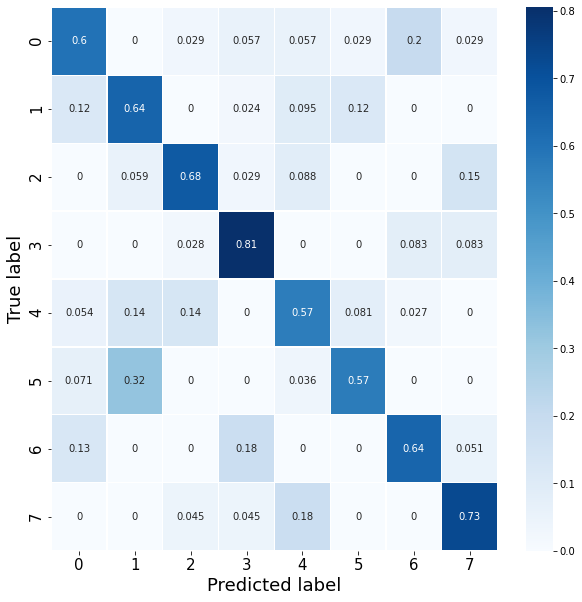

In [221]:
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',linewidths=0.2) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel('Predicted label',fontsize = 18)
plt.ylabel('True label',fontsize = 18)
plt.savefig('../../saved_figs/task2/conf matrix/conf_RF.pdf', dpi = 1200,bbox_inches = 'tight')
plt.show()

In [174]:
results_RF = np.array(RF_metrics)
print(results_RF.shape)
RF_results = pd.DataFrame(results_RF,columns= ['accuracy_train','accuracy_test',
                                               'f1_train','f1_test',
                                              'mattews_coeff_train','mattews_coeff_test'])

alg_names = ['RF']
RF_results.index = alg_names
display(RF_results)

(1, 6)


,accuracy_train,accuracy_test,f1_train,f1_test,mattews_coeff_train,mattews_coeff_test
RF,0.980716,0.652015,0.980814,0.650978,0.97787,0.601226


In [112]:
# count = 0
# accuracy = []
# f1_score_list = []
# matthew_list = []
# labels = [i for i in range(0,8)]

# X_using = X_norm
# for train_idx,val_idx in kf.split(X_using,y):
#     train_X_k = X_using.iloc[train_idx]
#     train_y_k = y.iloc[train_idx]
#     val_X_k = X_using.iloc[val_idx]
#     val_y_k = y.iloc[val_idx]   
#     rf = RandomForestClassifier(n_estimators=1000) 
#     rf.fit(train_X_k,train_y_k)
#     pred_k = rf.predict(val_X_k)
#     # print(pred_k)
#     accuracy_k = accuracy_score(val_y_k,pred_k)
#     f1_k = f1_score(val_y_k,pred_k, average = 'weighted')
#     accuracy.append(accuracy_k)
#     f1_score_list.append(f1_k)
#     print('------------------------------------------------')
#     print('Fold {}'.format(count))
#     print('conf test: ', confusion_matrix(val_y_k,pred_k,labels = labels, normalize = 'true'))
#     print('matthews_corrcoef test: ', matthews_corrcoef(val_y_k,pred_k))
#     matthew_list.append(matthews_corrcoef(val_y_k,pred_k))
#     count += 1
# print('test accuracy: ',accuracy)
# print('ave_test_accuracy: ', np.array(accuracy).mean())
# print('f1_score: ',f1_score_list)
# print('ave f1_score: ', np.array(f1_score_list).mean())
# print('ave matthews_corrcoef: ', np.array(matthew_list).mean())

------------------------------------------------
Fold 0
conf test:  [[0.74074074 0.03703704 0.03703704 0.         0.         0.07407407
  0.11111111 0.        ]
 [0.05263158 0.52631579 0.02631579 0.         0.07894737 0.26315789
  0.05263158 0.        ]
 [0.         0.         0.82608696 0.         0.04347826 0.
  0.         0.13043478]
 [0.         0.         0.         0.8        0.         0.
  0.1        0.1       ]
 [0.08       0.04       0.2        0.         0.64       0.
  0.04       0.        ]
 [0.16666667 0.33333333 0.         0.         0.         0.5
  0.         0.        ]
 [0.09090909 0.         0.         0.22727273 0.         0.
  0.59090909 0.09090909]
 [0.         0.         0.09090909 0.13636364 0.04545455 0.
  0.04545455 0.68181818]]
matthews_corrcoef test:  0.6078336370598415
------------------------------------------------
Fold 1
conf test:  [[0.56666667 0.         0.         0.06666667 0.         0.03333333
  0.3        0.03333333]
 [0.05263158 0.65789474 0.026

In [240]:
feature_importances_RF = pd.DataFrame({'Feature':list(X_using), 'Importance':RF.feature_importances_})
feature_importances_RF = feature_importances_RF.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)
display(feature_importances_RF.head(20))
feature_importances_RF.to_csv('task2 RF FI.csv')

,Feature,Importance
0,price,0.060155
1,12,0.052596
2,tshirt_standard_45/65cm,0.049178
3,col_rond,0.040879
4,manches_courtes,0.037942
5,6,0.037788
6,8,0.037438
7,7,0.037104
8,1,0.036124
9,Elasthanne,0.034688


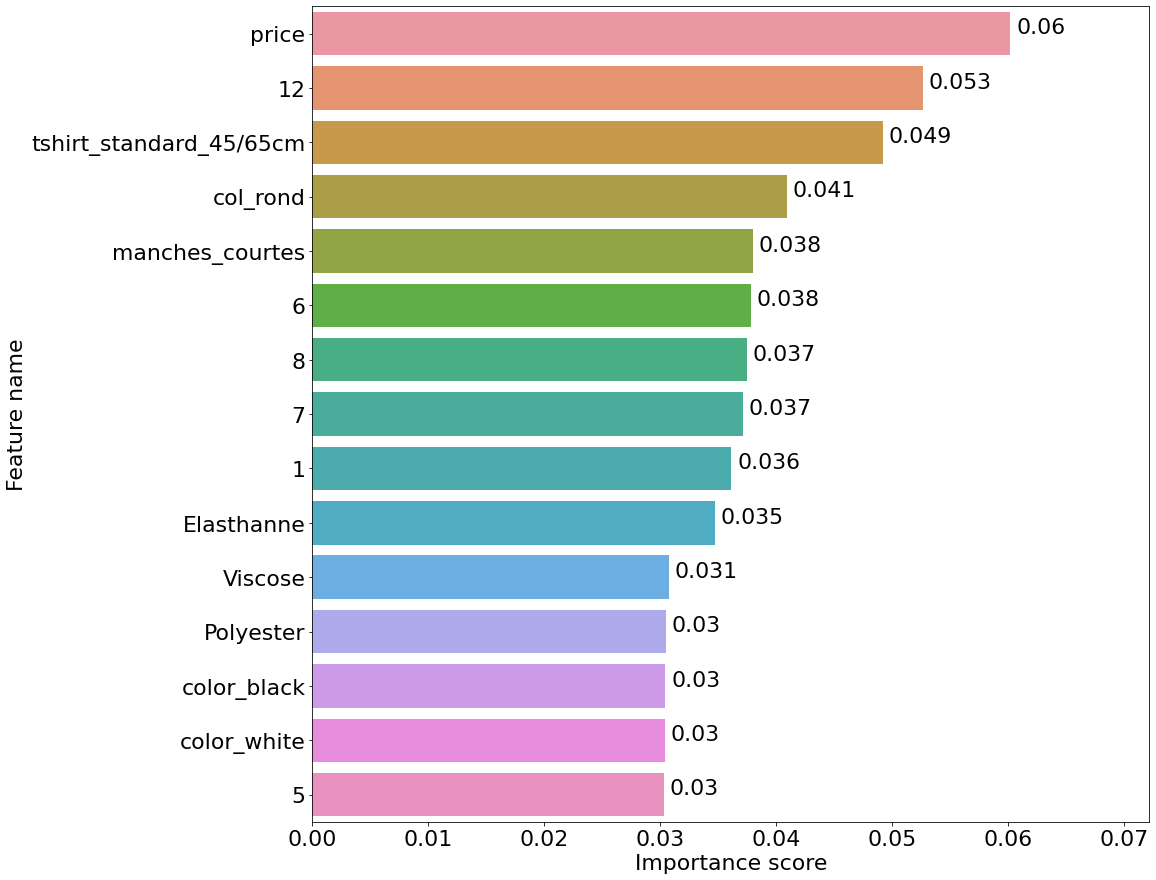

In [241]:
plt.figure(figsize=(15,15))
# sorted_counts = data_table['Elasthanne'].value_counts()
# print(sorted_counts.head())
g = sns.barplot(y=feature_importances_RF.loc[:14,'Feature'],
                x=feature_importances_RF.loc[:14,'Importance'],
                orient = 'h')

g.set_ylabel('Feature name', fontsize=22)
g.set_xlabel('Importance score', fontsize=22)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlim(0,feature_importances_RF.loc[0,'Importance']+0.012)

for i in range(15):
    g.text(feature_importances_RF.loc[i,'Importance']+5e-4,
           i,
           np.round(feature_importances_RF.loc[i,'Importance'],3), 
           color="black",ha="left",fontsize = 22)
plt.savefig("../../saved_figs/task2/Feature Importance/task2 FI RF.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

# RF with SMOTE

In [101]:
count = 0
accuracy = []
f1_score_list = []
matthew_list = []
labels = [i for i in range(0,8)]

smo = SMOTE(random_state=0)

X_using = X_norm
for train_idx,val_idx in kf.split(X_using,y):
    train_X_k = X_using.iloc[train_idx]
    train_y_k = y.iloc[train_idx]
    val_X_k = X_using.iloc[val_idx]
    val_y_k = y.iloc[val_idx]
    
    X_smo, y_smo = smo.fit_resample(train_X_k, train_y_k)
    
    rf = RandomForestClassifier(n_estimators=1000) 
    rf.fit(X_smo,y_smo)
    pred_k = rf.predict(val_X_k)
    # print(pred_k)
    accuracy_k = accuracy_score(val_y_k,pred_k)
    f1_k = f1_score(val_y_k,pred_k, average = 'weighted')
    accuracy.append(accuracy_k)
    f1_score_list.append(f1_k)
    print('------------------------------------------------')
    print('Fold {}'.format(count))
    print('conf test: ', confusion_matrix(val_y_k,pred_k,labels = labels, normalize = 'true'))
    print('matthews_corrcoef test: ', matthews_corrcoef(val_y_k,pred_k))
    matthew_list.append(matthews_corrcoef(val_y_k,pred_k))
    count += 1
print('test accuracy: ',accuracy)
print('ave_test_accuracy: ', np.array(accuracy).mean())
print('f1_score: ',f1_score_list)
print('ave f1_score: ', np.array(f1_score_list).mean())
print('ave matthews_corrcoef: ', np.array(matthew_list).mean())

------------------------------------------------
Fold 0
conf test:  [[0.74074074 0.03703704 0.03703704 0.         0.         0.07407407
  0.11111111 0.        ]
 [0.05263158 0.52631579 0.02631579 0.         0.07894737 0.26315789
  0.05263158 0.        ]
 [0.         0.         0.7826087  0.         0.04347826 0.
  0.         0.17391304]
 [0.         0.         0.         0.75       0.         0.
  0.15       0.1       ]
 [0.08       0.04       0.24       0.         0.6        0.
  0.04       0.        ]
 [0.16666667 0.33333333 0.         0.         0.         0.5
  0.         0.        ]
 [0.09090909 0.         0.         0.22727273 0.         0.
  0.59090909 0.09090909]
 [0.         0.         0.09090909 0.13636364 0.04545455 0.
  0.04545455 0.68181818]]
matthews_corrcoef test:  0.5902067811636202
------------------------------------------------
Fold 1
conf test:  [[0.53333333 0.         0.         0.06666667 0.03333333 0.03333333
  0.3        0.03333333]
 [0.05263158 0.63157895 0.026

In [102]:
## feature importance
feature_importances = pd.DataFrame({'Feature':list(X), 'Importance':rf.feature_importances_})
feature_importances = feature_importances.sort_values(by = ['Importance'], ascending = False)
display(feature_importances)

,Feature,Importance
69,12,0.063788
34,price,0.060925
23,tshirt_standard_45/65cm,0.048971
60,3,0.043827
10,col_rond,0.039441
...,...,...
6,col_fendu,0.000086
52,Lyocell,0.000083
3,col_bénit,0.000063
20,tshirt_bandeau,0.000012


# KNN Classifier

In [180]:
##Grid search
optimal_hp = []
KN_dataframe = []
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, train_size=0.8, random_state=11)
parameters = {"n_neighbors": np.arange(1,60,1),
             'weights':['uniform', 'distance']}
KN = KNeighborsClassifier(n_neighbors=10, weights='distance')
models = GridSearchCV(KN, param_grid= parameters,
                   scoring = 'f1_weighted',cv = kf)

grid = models.fit(X_train,y_train)
reg = grid.best_estimator_
print('--------Dataset ')
print('best score: %f'%grid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('{}: {}'.format(key, reg.get_params()[key]))
    print('test score: %f'%reg.score(X_test, y_test))
KN_dataframe.append(pd.DataFrame(grid.cv_results_).T)
# display(Ridge_dataframe)

--------Dataset  2
best score: 0.569834
best parameters:
n_neighbors: 1
test score: 0.571429
weights: uniform
test score: 0.571429


In [218]:
KN_metrics = []

time_start = time.time()

metrics = []

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_norm,
                                                            y,
                                                            test_size = 0.2,
                                                            random_state = 11)

KN = KNeighborsClassifier(n_neighbors=1, weights='uniform')

KN.fit(X_train_i,y_train_i)
pred_train_i = KN.predict(X_train_i)
pred_test_i = KN.predict(X_test_i)

display(pred_test_i)

metrics_list = [accuracy_score, f1_score, matthews_corrcoef]

for i,f in enumerate(metrics_list):
    if i ==1:
        metric_result_train = f(y_train_i,pred_train_i, average = 'weighted')
        metric_result_test = f(y_test_i,pred_test_i, average = 'weighted')
    else:
        metric_result_train = f(y_train_i,pred_train_i)
        metric_result_test = f(y_test_i,pred_test_i)
    metrics.append(metric_result_train)
    metrics.append(metric_result_test)
       
KN_metrics.append(metrics)

conf_matrix = confusion_matrix(y_test_i,pred_test_i,labels = labels, normalize = 'true')
conf_matrix = pd.DataFrame(conf_matrix)
conf_matrix.to_csv('conf_matrix_KNN.csv')

time_end = time.time()

total_time = time_end-time_start
print('total time: ', total_time)
print(KN_metrics)

array([6, 0, 1, 5, 6, 5, 0, 3, 7, 0, 0, 2, 0, 2, 2, 1, 5, 7, 2, 5, 4, 6,
       1, 3, 7, 0, 5, 1, 4, 1, 4, 0, 4, 1, 5, 1, 6, 6, 0, 5, 4, 1, 2, 7,
       2, 3, 1, 7, 3, 0, 3, 5, 6, 5, 2, 4, 3, 1, 7, 0, 6, 0, 3, 6, 2, 3,
       5, 2, 5, 2, 6, 5, 4, 1, 1, 3, 0, 6, 7, 3, 1, 7, 0, 1, 3, 0, 4, 7,
       6, 2, 7, 2, 2, 5, 4, 1, 1, 6, 7, 1, 3, 3, 4, 6, 6, 3, 6, 6, 5, 3,
       3, 0, 7, 2, 6, 1, 0, 1, 7, 0, 6, 6, 7, 5, 2, 0, 7, 0, 1, 7, 6, 2,
       5, 1, 3, 4, 6, 2, 6, 1, 5, 5, 6, 2, 1, 2, 2, 3, 3, 0, 6, 4, 3, 4,
       1, 3, 1, 1, 3, 2, 4, 1, 1, 4, 1, 0, 2, 1, 5, 4, 1, 2, 6, 1, 1, 5,
       6, 1, 2, 1, 4, 1, 7, 0, 5, 2, 5, 1, 7, 1, 5, 3, 0, 6, 6, 2, 3, 1,
       4, 2, 4, 1, 1, 3, 7, 1, 0, 7, 1, 0, 6, 7, 1, 0, 6, 4, 1, 6, 6, 3,
       5, 3, 2, 2, 4, 3, 0, 5, 1, 0, 4, 0, 2, 4, 1, 5, 7, 0, 6, 0, 2, 3,
       4, 7, 4, 2, 5, 7, 6, 1, 0, 2, 0, 4, 3, 1, 3, 3, 6, 5, 4, 0, 3, 1,
       3, 4, 6, 4, 2, 1, 2, 4, 3])

total time:  0.07622694969177246
[[0.977961432506887, 0.5714285714285714, 0.9778886209922156, 0.5725864224680496, 0.9747001514804002, 0.5085743024718694]]


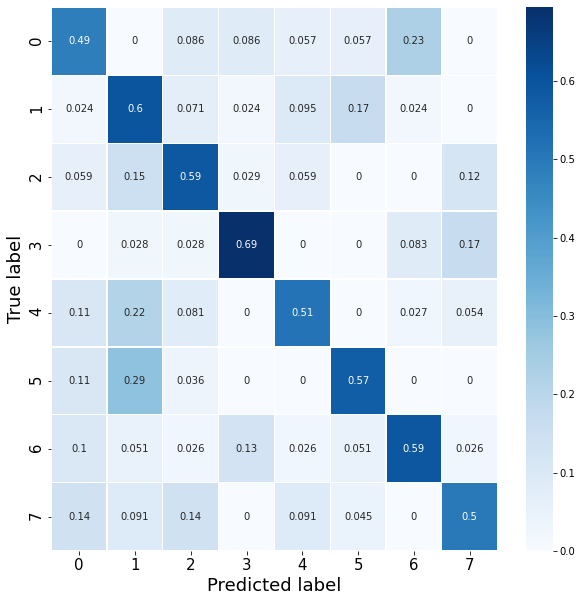

In [219]:
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',linewidths=0.2) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel('Predicted label',fontsize = 18)
plt.ylabel('True label',fontsize = 18)
plt.savefig('../../saved_figs/task2/conf matrix/conf_KNN.pdf', dpi = 1200,bbox_inches = 'tight')
plt.show()

In [204]:
results_KN = np.array(KN_metrics)
print(results_KN.shape)
KN_results = pd.DataFrame(results_KN,columns= ['accuracy_train','accuracy_test',
                                               'f1_train','f1_test',
                                              'mattews_coeff_train','mattews_coeff_test'])

alg_names = ['KN']
KN_results.index = alg_names
display(KN_results)

(1, 6)


,accuracy_train,accuracy_test,f1_train,f1_test,mattews_coeff_train,mattews_coeff_test
KN,0.977961,0.571429,0.977889,0.572586,0.9747,0.508574


# XGBoost

In [190]:
# Grid Search
##Grid search
optimal_hp = []
XG_dataframe = []

# parameters = {
#     'booster':'gbtree',
#     'objective':'reg:squarederror',
#     'gamma':0.1,
#     'max_depth':5,
#     'lambda':3,
#     'subsample':0.7,
#     'colsample_bytree':0.7,
#     'min_child_weight':3,
#     'slient':1,
#     'eta':0.1,
#     'seed':1000,
#     'nthread':4,
# }

tuned_parameters= {'n_estimators':[100,200,500],
                  'max_depth':range(3,12,2),# [3,5,7], ##range(3,10,2)
                  'learning_rate':np.arange(0.1,0.4,0.1),}

X_train, X_test, y_train, y_test = train_test_split(
    X_using, y, train_size=0.8, random_state=11)

XG = xgb.XGBClassifier(max_depth=10,
                        learning_rate=0.1,
                        n_estimators=160,
                    #         silent=False,
                        objective='multi:softmax')
# XG = xgb.XGBClassifier(max_depth=5,learning_rate=0.1,n_estimators=160,silent=True,objective='multi:softmax')
models = GridSearchCV(XG, 
                      param_grid= tuned_parameters,
                      scoring = 'f1_weighted',
                      n_jobs = -1,
                      cv = kf)

grid = models.fit(X_train,y_train)
reg = grid.best_estimator_
print('--------Dataset ')
print('best score: %f'%grid.best_score_)
print('best parameters:')
for key in tuned_parameters.keys():
    print('{}: {}'.format(key, reg.get_params()[key]))
    print('test score: %f'%reg.score(X_test, y_test))
XG_dataframe.append(pd.DataFrame(grid.cv_results_).T)
# display(Ridge_dataframe)

[16:07:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
--------Dataset  2
best score: 0.664951
best parameters:
n_estimators: 100
test score: 0.641026
max_depth: 3
test score: 0.641026
learning_rate: 0.30000000000000004
test score: 0.641026


In [195]:
## fine-tune --------------------------------------------
optimal_hp = []
XG_dataframe = []


tuned_parameters= {'n_estimators':[50,60,70,80,90],
                  'max_depth':[2,3,4],# [3,5,7], ##range(3,10,2)
                  'learning_rate':np.arange(0.2,0.4,0.05),
                  }

i ==0
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, train_size=0.8, random_state=11)

XG = xgb.XGBClassifier(max_depth=10,
                        learning_rate=0.1,
                        n_estimators=160,
                    #         silent=False,
                        objective='multi:softmax')

models = GridSearchCV(XG, 
                      param_grid= tuned_parameters,
                      scoring = 'f1_weighted',
                      n_jobs = -1,
                      cv = kf)

grid = models.fit(X_train,y_train)
reg = grid.best_estimator_
print('--------Dataset ',i)
print('best score: %f'%grid.best_score_)
print('best parameters:')
for key in tuned_parameters.keys():
    print('{}: {}'.format(key, reg.get_params()[key]))
    print('test score: %f'%reg.score(X_test, y_test))
KN_dataframe.append(pd.DataFrame(grid.cv_results_).T)

/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:16:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
--------Dataset  2
best score: 0.666675
best parameters:
n_estimators: 70
test score: 0.655678
max_depth: 4
test score: 0.655678
learning_rate: 0.3
test score: 0.655678


In [210]:
XG_metrics = []

time_start = time.time()


metrics = []


X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_norm,
                                                    y,
                                                test_size = 0.2,
                                               random_state = 11)
    

XG = xgb.XGBClassifier(max_depth=4,
                        learning_rate=0.3,
                        n_estimators=70,
                    #         silent=False,
                       use_label_encoder = False,
                        objective='multi:softmax')


XG.fit(X_train_i,y_train_i)
pred_train_i = XG.predict(X_train_i)
pred_test_i = XG.predict(X_test_i)

metrics_list = [accuracy_score, f1_score, matthews_corrcoef]

for i,f in enumerate(metrics_list):
    if i ==1:
        metric_result_train = f(y_train_i,pred_train_i, average = 'weighted')
        metric_result_test = f(y_test_i,pred_test_i, average = 'weighted')
    else:
        metric_result_train = f(y_train_i,pred_train_i)
        metric_result_test = f(y_test_i,pred_test_i)
    metrics.append(metric_result_train)
    metrics.append(metric_result_test)

XG_metrics.append(metrics)


conf_matrix = confusion_matrix(y_test_i,pred_test_i,labels = labels, normalize = 'true')
conf_matrix = pd.DataFrame(conf_matrix)
conf_matrix.to_csv('conf_matrix_XGB.csv')

time_end = time.time()

total_time = time_end-time_start
print('total time: ', total_time)
print(XG_metrics)

[23:10:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
total time:  0.8813951015472412
[[0.9550045913682277, 0.6556776556776557, 0.9550453030358004, 0.6558590776997005, 0.9483804652096117, 0.6055209950416027]]


In [197]:
results_XG = np.array(XG_metrics)
print(results_XG.shape)
XG_results = pd.DataFrame(results_XG,columns= ['accuracy_train','accuracy_test',
                                               'f1_train','f1_test',
                                              'mattews_coeff_train','mattews_coeff_test'])

alg_names = ['XG']
XG_results.index = alg_names
display(XG_results)

(1, 6)


,accuracy_train,accuracy_test,f1_train,f1_test,mattews_coeff_train,mattews_coeff_test
XG,0.955005,0.655678,0.955045,0.655859,0.94838,0.605521


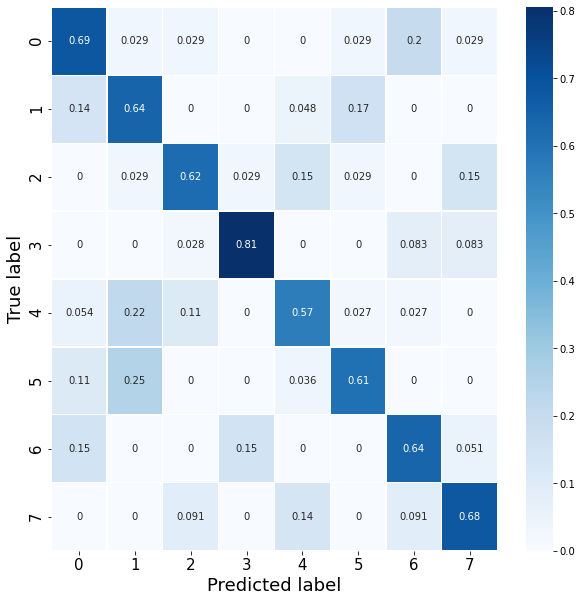

In [217]:
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',linewidths=0.2) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel('Predicted label',fontsize = 18)
plt.ylabel('True label',fontsize = 18)
plt.savefig('../../saved_figs/task2/conf matrix/conf_XGB.pdf', dpi = 1200,bbox_inches = 'tight')
plt.show()

In [238]:
feature_importances_XG = pd.DataFrame({'Feature':list(X_using), 'Importance':XG.feature_importances_})
feature_importances_XG = feature_importances_XG.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)
display(feature_importances_XG.head(20))
feature_importances_XG.to_csv('task2 XGB FI.csv')

,Feature,Importance
0,11,0.079808
1,9,0.066694
2,6,0.057027
3,3,0.056204
4,8,0.053677
5,2,0.047778
6,12,0.043969
7,10,0.043448
8,7,0.041884
9,4,0.039889


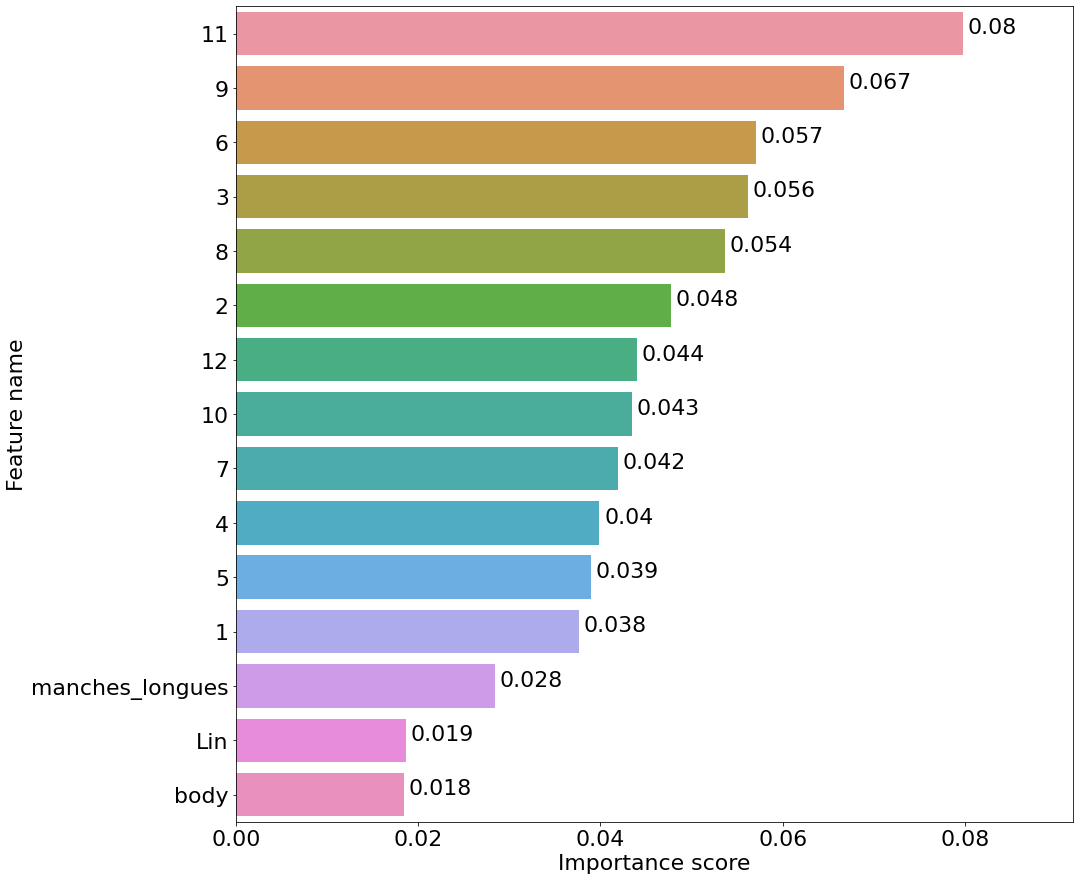

In [239]:
plt.figure(figsize=(15,15))
# sorted_counts = data_table['Elasthanne'].value_counts()
# print(sorted_counts.head())
g = sns.barplot(y=feature_importances_XG.loc[:14,'Feature'],
                x=feature_importances_XG.loc[:14,'Importance'],
                orient = 'h')

g.set_ylabel('Feature name', fontsize=22)
g.set_xlabel('Importance score', fontsize=22)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlim(0,feature_importances_XG.loc[0,'Importance']+0.012)

for i in range(15):
    g.text(feature_importances_XG.loc[i,'Importance']+5e-4,
           i,
           np.round(feature_importances_XG.loc[i,'Importance'],3), 
           color="black",ha="left",fontsize = 22)
plt.savefig("../../saved_figs/task2/Feature Importance/task2 FI XGB.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

# -corr

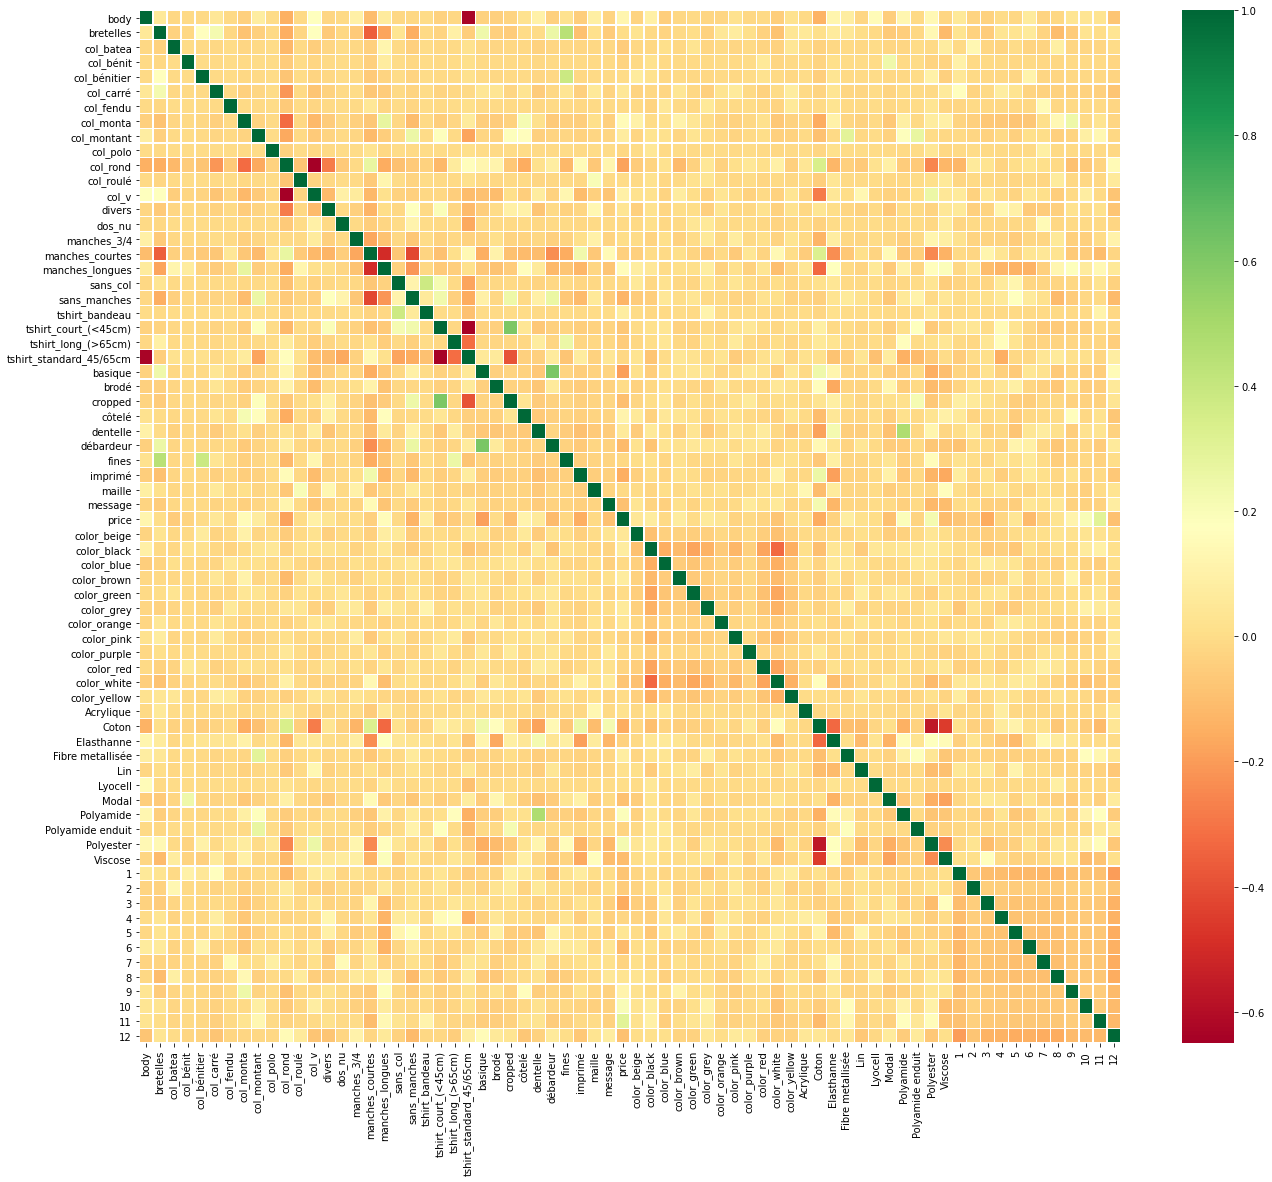

In [108]:
plt.figure(figsize=(22,19))
sns.heatmap(X.corr(method = 'pearson'),annot=False,cmap='RdYlGn',linewidths=0.2) 
plt.savefig('../../saved_figs/task2/Pearson heatmap.pdf', dpi = 1200)
plt.show()

,0,1
0,51.303722,-0.415667
1,48.242420,-1.825083
2,47.419407,-0.949901
3,43.918221,1.940084
4,43.918335,1.940377
...,...,...
1357,-48.163830,2.519552
1358,-48.062836,2.192981
1359,-47.862213,1.836244
1360,-47.860924,1.836035


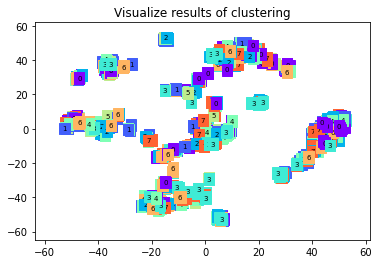

In [117]:
## visualize the result of clustering using TSNE
tsne = TSNE()
tsne.fit_transform(X.values)
tsne_results = pd.DataFrame(tsne.embedding_,index= data_table.index)
labels = y
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    # 降到二维了，分别给x和y
    X, Y = lowDWeights.iloc[:, 0], lowDWeights.iloc[:, 1]
    # 遍历每个点以及对应标签
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255/8 * s)) # 为了使得颜色有区分度，把0-255颜色区间分为9分,然后把标签映射到一个区间
        plt.text(x, y, s, backgroundcolor=c, fontsize=7)
    plt.xlim(X.min()-10, X.max()+10)
    plt.ylim(Y.min()-10, Y.max()+10); plt.title('Visualize results of clustering')
#     plt.savefig("../../saved_fig/clustering_results.pdf", dpi = 600)
    plt.show()

display(tsne_results)
plot_with_labels(tsne_results,labels)

,0,1
0,9.204957,-44.937645
1,7.512399,-42.035679
2,6.325082,-42.627708
3,1.775063,-45.084419
4,1.774748,-45.084415
...,...,...
1357,-25.968958,-14.616269
1358,-25.764200,-14.277564
1359,-25.128069,-14.534893
1360,-25.128069,-14.534893


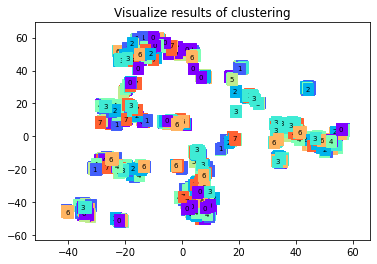

In [118]:
tsne = TSNE()
tsne.fit_transform(X_norm.values)
tsne_results = pd.DataFrame(tsne.embedding_,index= data_table.index)
labels = y
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    # 降到二维了，分别给x和y
    X, Y = lowDWeights.iloc[:, 0], lowDWeights.iloc[:, 1]
    # 遍历每个点以及对应标签
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255/8 * s)) # 为了使得颜色有区分度，把0-255颜色区间分为9分,然后把标签映射到一个区间
        plt.text(x, y, s, backgroundcolor=c, fontsize=7)
    plt.xlim(X.min()-10, X.max()+10)
    plt.ylim(Y.min()-10, Y.max()+10); plt.title('Visualize results of clustering')
#     plt.savefig("../../saved_fig/clustering_results.pdf", dpi = 600)
    plt.show()

display(tsne_results)
plot_with_labels(tsne_results,labels)